Ovde prikazujemo neke od načina koje možemo koristiti da utvrdimo da li podaci sa kojima radimo prate normalnu raspodelu. 

# Test normalnosti

U statističkoj analizi uglavnom imamo tri načina da odredimo da li naši podaci prate normalnu raspodelu ili koliko su blizu nje:

1. **Grafička reprezentacija raspodele**
   - [Grafik raspodele](https://seaborn.pydata.org/tutorial/distributions.html)
   - [Histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html)
   - [QQ grafik](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html)
   
  
2. **Metrike**
   - Asimetrija ('Skewness')
   - Mera špicastosti ('Kurtosis')
   
  
3. **Statistički testovi normalnosti**

**Podaci koje koristimo:** Generišemo skup 'random' 1000 vrednosti iz eksponencijalne raspodele.

### Grafički prikaz

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# zelimo da napravimo primer moguc za reprodukciju
np.random.seed(0)

# generisemo skup podataka
data = np.random.exponential(size=1000)

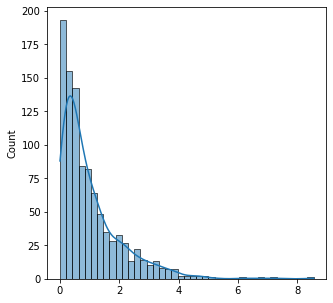

In [2]:
plt.figure(figsize = (5, 5))

# kreiramo histogram raspodele
sns.histplot(data, kde=True)   
# opcija kde=True dodaje KDE (Kernel Density Estimate) krivu koja procenjuje verovatnoću raspodele podataka na osnovu histograma.

plt.show()

Iz histograma vidimo da raspodela podataka, očekivano, **nije normalna**.

---------------------------------------------------------------------------------------------------------------

Jos jedan način da zaključimo da podaci nemaju normalnu raspodelu je konstrukcija **Q-Q grafika (Quantile-Quantile Plot)**

Q-Q grafici su grafici koji se koriste za poređenje raspodele dva skupa podataka ili za poređenje jednog skupa podataka sa teorijskom raspodelom (kao što je normalna raspodela). 
Ovi grafici vizualizuju u kojoj meri podaci slede određenu raspodelu, i ako odstupaju, na koji način to čine.

Q-Q grafici se često koriste za procenu normalnosti podataka. Na primer, ako želimo da proverimo da li podaci slede normalnu raspodelu, kreiramo Q-Q grafikon gde x-osa predstavlja kvantile normalne raspodele, a y-osa kvantile naših podataka.

   - Ako tačke leže na pravoj liniji, to sugeriše da podaci slede normalnu raspodelu.
   - Ako tačke odstupaju od linije, to ukazuje na odstupanje od normalnosti.

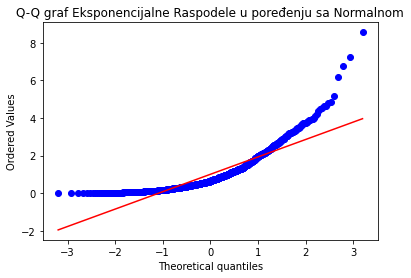

In [3]:
from scipy import stats

# Q-Q plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q graf Eksponencijalne Raspodele u poređenju sa Normalnom')
plt.show()

----------------------------------------------------------------------------------------------------------------

### Metrike

- **Asimetrija** je statistički termin koji meri koliko je raspodela podataka (a)simetrična u odnosu na njenu sredinu. 

- **Mera Špicastosti** je statistička mera koja opisuje oblik distribucije podataka, odnosno kako su podaci raspoređeni oko prosečne vrednosti.

Asimetrija (Skewness):

    skewness = 0: raspodela je simetrična (normalna raspodela)
    skewness > 0: rep raspodele vuče na desnu stranu, desna, pozitivna asimetričnost
    skewness < 0: duži rep levo, leva, negativna asimetričnost

Mera Špicastosti (Kurtosis):

    kurtosis = 3: normalna raspodela
    kurtosis > 3: raspodela je špicastija (više koncentrisana oko srednje vrednosti)
    kurtosis < 3: raspodela je spljoštena (ravnija)

In [6]:
import scipy
from scipy.stats import skew

skew_val = skew(data, axis=0, bias=True)
print('Skew:{}'.format(skew_val))

Skew:2.0526452829685935


In [7]:
from scipy.stats import kurtosis

kurt_val = kurtosis(data, axis=0, bias=True)
print('Kurtosis:{}'.format(kurt_val))

Kurtosis:6.476140290441888


S obzirom da je skew=2.05, a kurtosis=6.5, zakljucujemo da je naš skup podataka desno asimetričan i špicast, što smo takođe mogli da zaključimo i iz grafičke reprezentacije.

------------------------------------------------------------------------------------------------------------

### Statistički testovi normalnosti

Za procenu normalnosti uzorka podataka mozemo koristiti i različite vrste statističkih testova normalnosti.

Neki od njih su: 

 - **Shapiro-Wilk Test** (uglavnom za manje uzorke, samo za normalnu raspodelu)
 - **Kolmogorov-Smirnov Test** (generalni test)
 - **Anderson-Darling Test** (modifikacija K-S testa za testiranje normalnosti)

Koristimo Shapiro-Wilk Test za proveru. 
On testira nultu hipotezu da li uzorak podataka potiče iz normalne raspodele računajući vrednost p. 

- **p > 0.05**: Ne odbacujemo nultu hipotezu. Podaci mogu biti normalno raspodeljeni.
- **p ≤ 0.05**: Odbacujemo nultu hipotezu. Podaci verovatno nisu normalno raspodeljeni.

In [4]:
# za test je potrebno uvesti funkciju shapiro iz modula scipy.stats
from scipy.stats import shapiro

#racunamo p-vrednost
_, p = shapiro(data)
print('Shapiro-Wilk Test: p=%.3f' % (p))

if p > 0.05:
    print('Podaci su iz normalne raspodele (prihvatamo H0)')
else:
    print('Podaci nisu normalno raspodeljeni (odbacujemo H0)')

Shapiro-Wilk Test: p=0.000
Podaci nisu normalno raspodeljeni (odbacujemo H0)


Izvršićemo i Kolmogorov-Smirnov (K-S) test za proveru normalnosti naših podataka. 
Ovaj test upoređuje empirijsku distribuciju podataka sa očekivanom distribucijom.

Takodje testira nultu hipotezu da li uzorak podataka potiče iz normalne raspodele računajuci vrednost p.

- **p > 0.05**: Ne odbacujemo nultu hipotezu. Podaci mogu biti normalno raspodeljeni.
- **p ≤ 0.05**: Odbacujemo nultu hipotezu. Podaci verovatno nisu normalno raspodeljeni.

In [5]:
from scipy.stats import kstest, norm

# Primena Kolmogorov-Smirnov testa za normalnost
# Prvo, transformišemo podatke tako da budu standardizovani (srednja vrednost 0, standardna devijacija 1)
data_standardized = (data - np.mean(data)) / np.std(data)

_, p_value = kstest(data_standardized, 'norm')

# Prikaz rezultata testa
print('p-vrednost:', p_value)

if p_value > 0.05:
    print('Podaci su iz normalne raspodele (prihvatamo H0)')
else:
    print('Podaci nisu normalno raspodeljeni (odbacujemo H0)')

p-vrednost: 3.1874230847995995e-24
Podaci nisu normalno raspodeljeni (odbacujemo H0)


## Box-Cox transformacija

Nakon sto smo utvrdili da podaci sa kojima radimo nisu u normalnoj raspodeli, izvršićemo **Box-Cox transformaciju** nad njima.

Više o samoj transformaciji na [linku](02_box-cox.ipynb)

In [6]:
# uvodimo funkciju boxcox iz modula scipy.stats
from scipy.stats import boxcox

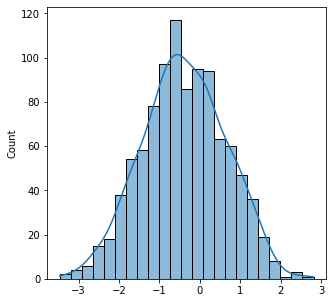

0.24201318675540698


In [7]:
# Primena Box-Cox transformacije
# Box-Cox transformacija zahteva pozitivne podatke
tdata, best_lambda = boxcox(data + 1e-9) # Dodajemo malu vrednost da izbegnemo log(0)

# Vizualizacija transformisanih podataka
plt.figure(figsize = (5, 5))
sns.histplot(tdata, kde=True) 
plt.show()


#prikazujemo najoptimalniju vrednost za lambdu
print(best_lambda)